# China Water Quality & Knowledge Thesis

Examining the link between water quality (2017, per prefecture) and a national general social survey (China General Social Survey, 2010) with an environmental module.

How do peoples perception of water quality (importance, status, severity, their knowledge, etc) align with actual water quality?

---

## Load Data

In [132]:
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.multivariate.manova import MANOVA
import sklearn
from sklearn import preprocessing

In [61]:
# Returns ALL columns when displaying DataFrame, useful for finding column names
pd.set_option('display.max_columns', None)

In [62]:
# To fix Chinese character font issues globally, but I don't think it works
# mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['font.serif'] = ['SimHei']

### 1. China General Social Survey (2010)

The first dataset is the China General Social Survey (CGSS), an annual national comprehensive survey consisting of demographic data, social indicators, and rotating modules. The year 2010 is used since it is the latest published which includes the environmental module, 20+ questions about quality of the environment, peoples' thoughts on the importance of the environment, the severity of environmental degredation, etc. (more details below).

http://cgss.ruc.edu.cn/index.php?r=index/index&hl=en

In [63]:
# Load cgss2010 Stata file, display the first 5 rows (.head())
cgss = pd.read_stata('../data/cgss2010_12.dta', convert_categoricals=False)
cgss.head()

id   s41   s42    s43    s44    s45  s5  a1202  a1402  a1502  a1602  a1203  \
0   1  28.0  81.0  122.0  327.0  436.0   1    1.0   40.0    2.0    2.0    1.0   
1   2  28.0  81.0  122.0  327.0  436.0   1    1.0   36.0    1.0    2.0    1.0   
2   3  28.0  81.0  122.0  327.0  436.0   1    2.0   45.0    1.0    2.0    1.0   
3   4  28.0  81.0  122.0  327.0  436.0   1    1.0   40.0    1.0    2.0    1.0   
4   5  28.0  81.0  122.0  327.0  436.0   1    2.0   55.0    1.0    2.0    1.0   

   a1403  a1503  a1603  a1204  a1404  a1504  a1604  a1205  a1405  a1505  \
0   17.0    2.0    2.0    1.0    7.0    1.0    2.0    NaN    NaN    NaN   
1   64.0    1.0    1.0    1.0   10.0    1.0    2.0    2.0    4.0    1.0   
2   48.0    1.0    2.0    2.0   16.0    1.0    2.0    NaN    NaN    NaN   
3   17.0    1.0    2.0    1.0   15.0    1.0    2.0    NaN    NaN    NaN   
4   29.0    2.0    2.0    2.0   27.0    2.0    2.0    1.0   18.0    1.0   

   a1605  a1206  a1406  a1506  a1606  a1207  a1407  a1507  a1607  a1208  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    2.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    2.0    1.0    4.0    1.0    2.0    NaN    NaN    NaN    NaN    NaN   

   a1408  a1508  a1608  a1209  a1409  a1509  a1609  a1210  a1410  a1510  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   a1610  a1211  a1411  a1511  a1611  a1212  a1412  a1512  a1612  a1213  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   a1413  a1513  a1613  a1214  a1414  a1514  a1614  a1215  a1415  a1515  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   a1615  a13201  a13202  a13203  a13204  a13205  a13206  a13207  a13208  \
0    NaN     1.0     2.0     2.0     NaN     NaN     NaN     NaN     NaN   
1    NaN     1.0     4.0     2.0     2.0     NaN     NaN     NaN     NaN   
2    NaN     3.0     3.0     5.0     NaN     NaN     NaN     NaN     NaN   
3    NaN     6.0     9.0     9.0     NaN     NaN     NaN     NaN     NaN   
4    NaN     1.0     2.0     6.0     2.0     9.0     NaN     NaN     NaN   

   a13209  a13210  a13211  a13212  a13213  a13214  a13301  a13302  a13303  \
0     NaN     NaN     NaN     NaN     NaN     NaN     2.0     2.0     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     3.0     2.0     2.0   
2     NaN     NaN     NaN     NaN     NaN     NaN     1.0     2.0     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     2.0     2.0     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     2.0     6.0     2.0   

   a13304  a13305  a13306  a13307  a13308  a13309  a13310  a13311  a13312  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN

#### Important Survey Questions' Information below

###### Important Survey Questions

### General Demographics
s41 - province codes

a2 - gender

a3a - birth year

a3b - birth month

a3c - birth date

a7a - highest current level of education

a8a - personal total income

a15 - subjective physical health

a62 - family total income (2009)

a91 - rural / agricultural household *(1=yes, 2=no)*

a92 - rural / agricultural household *(1=yes, 2=no) (verified by surveyor)*


### Environmental Module (Part L)
l1a - "In your opinion, in terms of the current situation in our country, which of the following issues is the most important?" **(4 = environment)**

l1b - *like l1a, but 2nd most important*

l6a - "In your opinion, in terms of the current situation in our country, which of the following issues is the most important?" *(1 = not at all, 5 = very concerned)*

l6b - How serious are env. problems facing China? *(1 = very, 5 = not at all)*

l7a - Which is most important env. issue in China? **(4 = water pollution)**

l7b - Which has greatest impact on you/family? **(4 = water pollution)**

l8a - Knowledge of causes of environmental problems from ?l7

l8b - Knowledge of solutions of environmental problems from ?l7

l12a - "In order to protect the environment, to what extent are you willing to pay a higher price?" *(1 = very willing, 5 = very reluctant)*

l12b - *like l12a, but with higher taxes*

l12c - like l12a/b, but with willingness to lower living standards

l137 - "Environmental issues directly affect my daily life" *(1 = disagree, 5 = agree)*

l14d - "How do you think the pollution of rivers, rivers and lakes in China is harmful to the environment?" *(1 = extremely, 5 = not at all)*

l15a/b - *see question, about statements of responsibility for environmental protection (individuals/companies, government, etc.)*

l16c - "In terms of solving environmental problems in your area, how do you think the local government has done in the past five years?" *(1 = ignored, 5 = successful)*

l20e - "Do you often save water or reuse water specifically for environmental protection?" *(1 = always, 4 = never)*

l2409 - "In the domestic water pollution report, the water quality of Category V (5) is better than that of Category I (1)" *(1 = correct, 2 = incorrect, 8 = cannot choose)*


In [64]:
important_questions = ['score','s41','a2','a3a','a3b','a3c','a7a','a8a','a15','a62','a91','a92','l1a','l1b','l6a','l7a','l7b','l8a','l8b','l12a','l12b','l12c','l137','l14d','l15a','l15b','l16c','l20e','l2409']

Below is a subset of only important questions from the environmental module (including and omitting`s41`)

In [65]:
environment = ['s41','l1a','l1b','l6a','l7a','l7b','l8a','l8b','l12a','l12b','l12c','l137','l14d','l15a','l15b','l16c','l20e','l2409']

In [66]:
part_l = ['l1a','l1b','l6a','l7a','l7b','l8a','l8b','l12a','l12b','l12c','l137','l14d','l15a','l15b','l16c','l20e','l2409']

For some reason, I need to manually copy the list of important column codes. They are the same as the `important questions` above.

In [67]:
cgss_important = cgss[['s41','a2','a3a','a3b','a3c','a7a','a8a','a15','a62','a91','a92','l1a','l1b','l6a','l7a','l7b','l8a','l8b','l12a','l12b','l12c','l137','l14d','l15a','l15b','l16c','l20e','l2409']]
cgss_important.describe()

s41            a2           a3a           a3b           a3c  \
count  11783.000000  11783.000000  11783.000000  11783.000000  11783.000000   
mean      15.366205      1.518204   1962.196809      6.590512     14.806331   
std        8.865554      0.499690     35.062692      3.472828      8.585052   
min        1.000000      1.000000     -3.000000     -3.000000     -3.000000   
25%        7.000000      1.000000   1952.000000      3.000000      8.000000   
50%       15.000000      2.000000   1964.000000      7.000000     15.000000   
75%       22.000000      2.000000   1974.000000     10.000000     22.000000   
max       31.000000      2.000000   1993.000000     12.000000     31.000000   

                a7a          a8a           a15         a62           a91  \
count  11783.000000    11783.000  11783.000000    11783.00  11782.000000   
mean       4.840703  1395715.625      3.606891  1266528.50      1.565948   
std        2.998698  3442447.500      1.139152  3271839.25      0.504143   
min       -3.000000        0.000     -3.000000        0.00     -3.000000   
25%        3.000000     4000.000      3.000000    15000.00      1.000000   
50%        4.000000    12000.000      4.000000    30000.00      2.000000   
75%        6.000000    30000.000      4.000000    61104.00      2.000000   
max       14.000000  9999999.000      5.000000  9999999.00      2.000000   

               a92          l1a          l1b          l6a          l7a  \
count  6694.000000  3672.000000  3672.000000  3672.000000  3672.000000   
mean      1.898267     9.581155    10.884532     3.720316    14.029956   
std       0.396405    23.114167    25.581364     1.133402    29.785397   
min      -3.000000    -3.000000    -3.000000    -3.000000    -3.000000   
25%       2.000000     1.000000     1.000000     3.000000     1.000000   
50%       2.000000     2.000000     2.000000     4.000000     4.000000   
75%       2.000000     6.000000     6.000000     4.000000     6.000000   
max       2.000000    98.000000    98.000000     8.000000    98.000000   

               l7b          l8a          l8b         l12a         l12b  \
count  3672.000000  3672.000000  3672.000000  3672.000000  3672.000000   
mean     13.319989     2.920752     2.583333     3.280229     3.543028   
std      28.256381     1.539628     1.583291     1.863691     1.877130   
min      -3.000000    -3.000000    -3.000000    -3.000000    -3.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       4.000000     3.000000     2.000000     3.000000     3.000000   
75%       6.000000     4.000000     3.000000     4.000000     4.000000   
max      98.000000     8.000000     8.000000     8.000000     8.000000   

              l12c         l137         l14d         l15a         l15b  \
count  3672.000000  3672.000000  3672.000000  3672.000000  3672.000000   
mean      3.572440     3.820534     2.913943     3.227669     3.192810   
std       1.766908     1.606539     1.994326     2.708164     2.632461   
min      -3.000000    -3.000000    -3.000000    -3.000000    -3.000000   
25%       2.000000     3.000000     2.000000     2.000000     2.000000   
50%       4.000000     4.000000     2.000000     2.000000     2.000000   
75%       4.000000     5.000000     3.000000     2.000000     2.000000   
max       8.000000     8.000000     8.000000     8.000000     8.000000   

              l16c         l20e        l2409  
count  3672.000000  3672.000000  3672.000000  
mean      3.463780     2.482026     6.352397  
std       2.159607     1.031619     2.881289  
min      -3.000000    -3.000000    -3.000000  
25%       2.000000     2.000000     2.000000  
50%       3.000000     3.000000     8.000000  
75%       4.000000     3.000000     8.000000  
max       8.000000     4.000000     8.000000

#### Very Limited Subset of Questions (for initial analysis)

This only includes the most important questions,

In [68]:
columns_strict = ['s41','l14d','l2409']

In [69]:
cgss_strict = cgss[columns_strict]

Only include the strict set of 3 columns

The survey uses geographic identifiers in columns s41 (and I think s42-44). However, only province level information is released, due to privacy concerns (see [this link](http://cgss.ruc.edu.cn/index.php?r=index/artabout&aid=18)). They are listed below, in a dictionary (Chinese)

In [70]:
provinces = pd.read_csv('prov.csv')
provinces.set_index('s41')

province_full province     province_en
s41                                       
1             上海市       上海        Shanghai
2             云南省       云南          Yunnan
3          内蒙古自治区      内蒙古  Inner Mongolia
4             北京市       北京         Beijing
5             吉林省       吉林           Jilin
6             四川省       四川         Sichuan
7             天津市       天津         Tianjin
8         宁夏回族自治区       宁夏         Ningxia
9             安徽省       安徽           Anhui
10            山东省       山东        Shandong
11            山西省       山西          Shanxi
12            广东省       广东       Guangdong
13        广西壮族自治区       广西         Guangxi
14       新疆维吾尔自治区       新疆        Xinjiang
15            江苏省       江苏         Jiangsu
16            江西省       江西         Jiangxi
17            河北省       河北           Hebei
18            河南省       河南           Henan
19            浙江省       浙江        Zhejiang
20            海南省       海南          Hainan
21            湖北省       湖北           Hubei
22            湖南省       湖南           Hunan
23            甘肃省       甘肃           Gansu
24            福建省       福建          Fujian
25          西藏自治区       西藏           Tibet
26            贵州省       贵州         Guizhou
27            辽宁省       辽宁        Liaoning
28            重庆市       重庆       Chongqing
29            陕西省       陕西         Shaanxi
30            青海省       青海         Qinghai
31           黑龙江省      黑龙江    Heilongjiang

---

### 2. 2018 Blue City Water Quality Index Ranking

The second dataset is the water quality of every prefecture (sub-province) from a 2018 publication (using 2017 measurements). **Add more details**

https://wwwoa.ipe.org.cn//Upload/201909201147459274.pdf (en)

In [71]:
wqir = pd.read_csv('../data/wqir2018_zh.csv', sep=' ', encoding = "UTF-8")

In [72]:
province = wqir['province']
score = wqir['score']
city = wqir['city']
category = wqir['level']

---

## Data Exploration

### CGSS2010

#### Heatmap Function

The following function asks the user to imput a column title (question code). Any column name can be entered, but for interesting results, choose one from the above list of important survey questions.

Once the column name is entered, the function displays a visual heatmap of the response types by decimal (total = 1.0) on the x axis, sorted by province on the y axis.

Enter `heatmap()` to execute this function.

In [73]:
def heatmap():
    user_column = input('Enter a column code: ')
    user = cgss[cgss[user_column] >= 1]
    # Group by provence, count people in each province, then sort them by asceding order.
    user_grouped = (user.groupby(['s41', user_column])
        .size()
        .unstack(fill_value=0)
        .sort_index(axis=1, ascending=True)
        )
    user_grouped_percent=user_grouped.div(user.groupby(['s41']).size(), axis=0)
    user_grouped_percent=user_grouped_percent.round(1)
    fig, ax = plt.subplots()
    sns.set_theme(
        style="white",
        font='AR PL UMing CN',
        font_scale=.30,
        )
    sns.heatmap(
        user_grouped_percent,
        vmin=0,
        vmax=1,
        yticklabels=1,
        annot=True,
        cmap='viridis',
        square=True,
        cbar=False,
        )
    ax.set_title(user_column)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=0, ha="center", rotation_mode="anchor")
    fig.tight_layout()

#### Count Function

The following function does the same initial steps as the `heatmap` function, but without normalizing by the number of responses per province (it only sums the responses by type and by province).

Enter `count()` to execute this function.

In [74]:
def count():
    user_column = input('Enter a column code: ')
    user = cgss[cgss[user_column] >= 1]
    user_grouped = (user.groupby(['s41', user_column])
        .size()
        .unstack(fill_value=0)
        .sort_index(axis=1, ascending=True)
        )
    return user_grouped

#### Percent Function

The following function is the same as the `count` function, but also normalizes per province to make quanities comparable. It's essentially the `heatmap` function without the visualization.

Enter `percent()` to execute this function.

In [75]:
def percent():
    user_column = input('Enter a column code: ')
    user = cgss[cgss[user_column] >= 1]
    user_grouped = (user.groupby(['s41', user_column])
        .size()
        .unstack(fill_value=0)
        .sort_index(axis=1, ascending=True)
        )
    user_grouped_percent=user_grouped.div(user.groupby(['s41']).size(), axis=0)
    user_grouped_percent=user_grouped_percent
    user_grouped_percent=user_grouped_percent
    return user_grouped_percent

#### Individual Question Countplot

The following function visualizes number of responses (total, not per province) for each response type of an entered column (question code).

Enter `countplot()` to execute this function.

In [76]:
def countplot():
    user_column = input('Enter a column code: ')
    sns.countplot(
        data=cgss,
        x=cgss[user_column],
        )

---

### 2018 Blue City Water Quality Index Ranking Visualization (WQIR2018)

The following shows statististical information for the WQIR2018 dataset. Let's see the data, loaded above. As evident, the `Province`, `City`, `Score`, `Rank`, and the `Level` for the water quality level.

In [77]:
wqir.head()

rank province city  score level
0     1       青海  海南州   4.04     优
1     2       四川   甘孜   4.11     优
2     3       四川   阿坝   4.42     优
3     4       青海   海北   4.58     优
4     5       青海   果洛   4.73     优

On page 5 of the report [here](https://wwwoa.ipe.org.cn//Upload/201909201147459274.pdf) (mentioned above), the following are the score/level to water quality classes (outlined [here](http://english.mee.gov.cn/SOE/soechina1997/water/standard.htm)):

| IPE Score     | IPE Level (EN)          | IPE Level (ZH) | EQ  Water |
|:-------------:|:-----------------------:|:--------------:|:---------:|
| 0.00 - 4.79   | Excellent               | 优             | II     |
| 4.79 - 10.28  | Good                    | 良             |III    |
| 10.28 - 16.85 | Moderate                | 一般           | IV     |
| 16.85 - 24.74 | Relatively Poor         | 较差           | V       |
| 24.70 - 50.00 | Poor                    | 差             | V      |

*Note: The EQ equivalents above refer "The total score (equivalent to the local water
quality average) met or surpassed the requirements of Class `X` (II-V) water quality..."*

In [78]:
wqir_mean = wqir.groupby(by='province').agg('mean')

The following plot visualizes the WQIR2018 values by province (y axis), with each prefecture's score lined up on the x axis. This is to visualize the range of water quality values in each province. On the top and right, two histograms count the occurances at each value (horizontal, top one bins water quality scores, while the vertical, right one bins the number of prefecture regions per province).

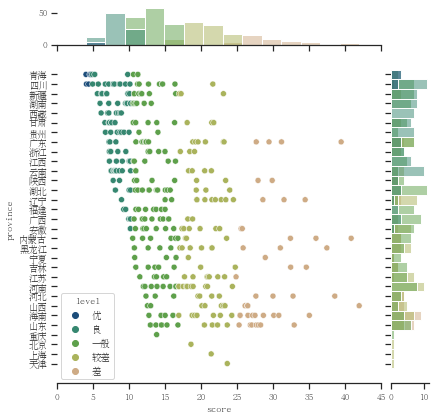

In [79]:
sns.set_theme(
    style="ticks",
    font='AR PL UMing CN',
    font_scale=.85,
    )

g = sns.JointGrid(
    ratio=7,
    space=.25,
    marginal_ticks=True,
    xlim=(0,45),
    x=score,
    y=province,
    palette="gist_earth",
    hue=category,
    data=wqir,
) 
  
sns.despine(trim=False, left=True, bottom=False)
g.plot(sns.scatterplot, sns.histplot)

The provinces of 青海 (Qinghai), 海南 (Hainan), and 西藏 (Tibet) have good water quality which is relatively uniform. These make for good comparison with provinces with worse water quality.

---

## Combining Data

In this section, I will try to link the data from CGSS2010 and WQIR2018 and compare them across provinces.

## Sorting Data

This section has the data loaded previously sorted, usually by province.

First, count the values of the `cgss_strict` df (so it's easier to deal with and understand) by province `s41`. I learned this [here](https://kanoki.org/2020/03/09/how-to-use-pandas-count-and-value_counts/).

In [80]:
cgss_strict.groupby(by='s41').agg('count')

l14d  l2409
s41              
1.0    183    183
2.0    103    103
3.0     28     28
4.0    173    173
5.0    164    164
6.0    179    179
7.0    120    120
8.0     27     27
9.0    126    126
10.0   153    153
11.0    96     96
12.0   190    190
13.0   122    122
14.0    18     18
15.0   158    158
16.0   165    165
17.0    91     91
18.0   157    157
19.0   196    196
20.0    29     29
21.0   209    209
22.0   155    155
23.0    52     52
24.0   101    101
25.0    19     19
26.0    89     89
27.0   119    119
28.0    89     89
29.0   120    120
30.0    26     26
31.0   215    215

### `l14d`

Sort by response types for `l14d`, see the number of responses. Column `s41` is irrelavent, this is just to see all response types for `l14d` to check for incorrect values.

Call one column `l14d`, then count instances of values with `.value_counts()`, then make a dataframe with `.to_frame()`, then sort by the response value with `.sort_index()`

In [81]:
cgss_strict['l14d'].value_counts().to_frame().sort_index()

l14d
-3.0     6
-2.0    11
 1.0   565
 2.0  1429
 3.0   972
 4.0   250
 5.0    37
 8.0   402

As we can see, there are negative values, which are not valid response types. Let's see which provinces they're in, to see if we can safely drop the values.

In [82]:
cgss_strict[cgss_strict['l14d'] < 0].groupby(by='s41').agg('count')

l14d  l2409
s41              
1.0      2      2
2.0      3      3
6.0      1      1
7.0      1      1
10.0     1      1
17.0     1      1
19.0     1      1
21.0     2      2
22.0     1      1
25.0     2      2
28.0     1      1
31.0     1      1

### `l2409`

repeat

In [83]:
cgss_strict['l2409'].value_counts().to_frame().sort_index()

l2409
-3.0     25
-2.0     19
 1.0    287
 2.0    596
 8.0   2745

In [84]:
cgss_strict[cgss_strict['l2409'] < 0].groupby(by='s41').agg('count')

l14d  l2409
s41              
1.0      2      2
2.0      3      3
6.0      2      2
7.0      5      5
10.0     1      1
12.0     1      1
15.0     2      2
16.0     1      1
19.0     1      1
22.0     2      2
25.0    17     17
28.0     1      1
29.0     2      2
31.0     4      4

---

For the first question `l14d`, the negative values are fairly spread out between columns. It's safe to drop them.


However, for `l2409`, they make up a large proportion of the total response values for province 25, which is Tibet. As seen below, filtered just for Tibet for question l2409, 17/19 responses are invalid. Because water quality for Tibet also isn't included, we're forced to remove it from this analysis.

In [85]:
cgss_strict[cgss_strict['s41']==25].groupby('l2409').agg('count')

s41  l14d
l2409           
-3.0    17    17
 8.0     2     2

The response value of 8 refers to "cannot choose", so for now, let's drop those (it may be important later)

Let's drop the two problmatic values -3 and -2, and 8, group by province again, and calculate the mean.

## **If I filter out 8, then Ningxia province get's taken out... find a fix**

In [86]:
cgss_strict_mean = cgss_strict.replace([-3,-2,],).groupby(by='s41').agg('mean')
cgss_strict_mean

l14d     l2409
s41                     
1.0   2.500000  5.726776
2.0   3.514851  7.108911
3.0   3.000000  3.607143
4.0   2.358382  5.936416
5.0   2.902439  6.371951
6.0   3.273743  7.061798
7.0   2.466667  6.067797
8.0   2.888889  5.518519
9.0   3.412698  7.325397
10.0  3.184211  7.375000
11.0  2.427083  7.218750
12.0  2.500000  6.280423
13.0  3.557377  7.327869
14.0  2.555556  2.555556
15.0  2.468354  6.762821
16.0  3.660606  6.914634
17.0  3.098901  7.131868
18.0  2.560510  5.503185
19.0  2.912821  5.857143
20.0  2.034483  6.896552
21.0  3.538462  6.861244
22.0  2.954545  6.588235
23.0  2.557692  2.826923
24.0  2.940594  7.267327
25.0  1.944444  8.000000
26.0  2.910112  6.707865
27.0  2.310924  6.478992
28.0  3.393258  6.966292
29.0  3.833333  6.449153
30.0  2.076923  3.076923
31.0  2.846512  6.405660

### Merge Data

The following merges the `wqir_mean` values with the `provinces` dataframe.

In [87]:
merge = pd.merge(wqir_mean, provinces, on='province')
merge

province        rank      score  s41 province_full     province_en
0        上海  282.000000  21.400000    1           上海市        Shanghai
1        云南  109.750000  11.520625    2           云南省          Yunnan
2       内蒙古  240.416667  21.080833    3        内蒙古自治区  Inner Mongolia
3        北京  248.000000  18.600000    4           北京市         Beijing
4        吉林  233.888889  19.920000    5           吉林省           Jilin
5        四川   89.714286  10.035714    6           四川省         Sichuan
6        天津  313.000000  23.630000    7           天津市         Tianjin
7        宁夏  221.600000  17.930000    8       宁夏回族自治区         Ningxia
8        安徽  211.937500  16.977500    9           安徽省           Anhui
9        山东  272.470588  21.858824   10           山东省        Shandong
10       山西  282.090909  23.310000   11           山西省          Shanxi
11       广东  209.095238  18.218095   12           广东省       Guangdong
12       广西  154.857143  13.372143   13       广西壮族自治区         Guangxi
13       新疆  111.222222  11.363889   14      新疆维吾尔自治区        Xinjiang
14       江苏  238.307692  18.369231   15           江苏省         Jiangsu
15       江西  102.909091  10.948182   16           江西省         Jiangxi
16       河北  274.727273  23.132727   17           河北省           Hebei
17       河南  220.944444  16.965556   18           河南省           Henan
18       浙江  143.909091  12.918182   19           浙江省        Zhejiang
19       海南  283.400000  22.881500   20           海南省          Hainan
20       湖北  166.647059  14.098824   21           湖北省           Hubei
21       湖南   83.857143   9.966429   22           湖南省           Hunan
22       甘肃  123.285714  12.150000   23           甘肃省           Gansu
23       福建  134.444444  12.234444   24           福建省          Fujian
24       西藏   39.000000   7.845714   25         西藏自治区           Tibet
25       贵州   72.777778   9.445556   26           贵州省         Guizhou
26       辽宁  272.357143  21.995714   27           辽宁省        Liaoning
27       重庆  172.000000  13.840000   28           重庆市       Chongqing
28       陕西  193.400000  16.844000   29           陕西省         Shaanxi
29       青海   38.500000   6.901250   30           青海省         Qinghai
30      黑龙江  247.692308  20.290000   31          黑龙江省    Heilongjiang

Add water quality mean (per province) to each individual row:

Then, the `cgss_strict_clean` values are merged in. (I didn't know how to do this in one step)

In [88]:
merged = pd.merge(merge,cgss_strict_mean,on='s41')
merged

province        rank      score  s41 province_full     province_en  \
0        上海  282.000000  21.400000    1           上海市        Shanghai   
1        云南  109.750000  11.520625    2           云南省          Yunnan   
2       内蒙古  240.416667  21.080833    3        内蒙古自治区  Inner Mongolia   
3        北京  248.000000  18.600000    4           北京市         Beijing   
4        吉林  233.888889  19.920000    5           吉林省           Jilin   
5        四川   89.714286  10.035714    6           四川省         Sichuan   
6        天津  313.000000  23.630000    7           天津市         Tianjin   
7        宁夏  221.600000  17.930000    8       宁夏回族自治区         Ningxia   
8        安徽  211.937500  16.977500    9           安徽省           Anhui   
9        山东  272.470588  21.858824   10           山东省        Shandong   
10       山西  282.090909  23.310000   11           山西省          Shanxi   
11       广东  209.095238  18.218095   12           广东省       Guangdong   
12       广西  154.857143  13.372143   13       广西壮族自治区         Guangxi   
13       新疆  111.222222  11.363889   14      新疆维吾尔自治区        Xinjiang   
14       江苏  238.307692  18.369231   15           江苏省         Jiangsu   
15       江西  102.909091  10.948182   16           江西省         Jiangxi   
16       河北  274.727273  23.132727   17           河北省           Hebei   
17       河南  220.944444  16.965556   18           河南省           Henan   
18       浙江  143.909091  12.918182   19           浙江省        Zhejiang   
19       海南  283.400000  22.881500   20           海南省          Hainan   
20       湖北  166.647059  14.098824   21           湖北省           Hubei   
21       湖南   83.857143   9.966429   22           湖南省           Hunan   
22       甘肃  123.285714  12.150000   23           甘肃省           Gansu   
23       福建  134.444444  12.234444   24           福建省          Fujian   
24       西藏   39.000000   7.845714   25         西藏自治区           Tibet   
25       贵州   72.777778   9.445556   26           贵州省         Guizhou   
26       辽宁  272.357143  21.995714   27           辽宁省        Liaoning   
27       重庆  172.000000  13.840000   28           重庆市       Chongqing   
28       陕西  193.400000  16.844000   29           陕西省         Shaanxi   
29       青海   38.500000   6.901250   30           青海省         Qinghai   
30      黑龙江  247.692308  20.290000   31          黑龙江省    Heilongjiang   

        l14d     l2409  
0   2.500000  5.726776  
1   3.514851  7.108911  
2   3.000000  3.607143  
3   2.358382  5.936416  
4   2.902439  6.371951  
5   3.273743  7.061798  
6   2.466667  6.067797  
7   2.888889  5.518519  
8   3.412698  7.325397  
9   3.184211  7.375000  
10  2.427083  7.218750  
11  2.500000  6.280423  
12  3.557377  7.327869  
13  2.555556  2.555556  
14  2.468354  6.762821  
15  3.660606  6.914634  
16  3.098901  7.131868  
17  2.560510  5.503185  
18  2.912821  5.857143  
19  2.034483  6.896552  
20  3.538462  6.861244  
21  2.954545  6.588235  
22  2.557692  2.826923  
23  2.940594  7.267327  
24  1.944444  8.000000  
25  2.910112  6.707865  
26  2.310924  6.478992  
27  3.393258  6.966292  
28  3.833333  6.449153  
29  2.076923  3.076923  
30  2.846512  6.405660

Quick check to see if there are visible trends...

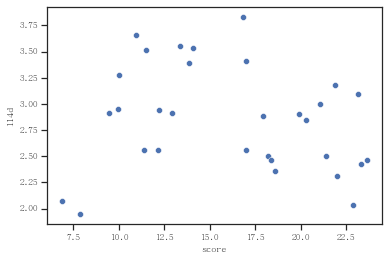

In [89]:
g = sns.scatterplot(
    x='score',
    y='l14d',
    palette="gist_earth",
    data=merged,
)

---

Now, let's do this with the larger `cgss_important` dataframe:

*Trying to get a df with values as index and frequency per question (column), but can't...*

In [90]:
cgss_part_l = cgss_important[part_l]
for column in cgss_part_l:
    counts = cgss_part_l[column].value_counts()
    counts.append(counts)

Create the mean of all values from `cgss_important`:

In [91]:
cgss_imp_mean = cgss_important.groupby(by='s41').agg('mean')

Merge with water quality and provinces:

In [92]:
merged_imp = pd.merge(merge,cgss_imp_mean,on='s41')

*Play around with some correlations:*

In [93]:
corr = cgss_important.corr(method="pearson")

In [94]:
corr_mean = merged_imp.corr(method="pearson")

Plot, first set the theme

In [95]:
sns.set_theme(
    style="white",
    font='AR PL UMing CN',
    font_scale=.2,
    )

/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/will/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


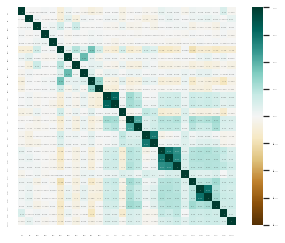

In [96]:
corr_hm = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='BrBG',
    square=True,
    cbar=True,
    center=0
    )

In [97]:
figure1 = corr_hm.get_figure()

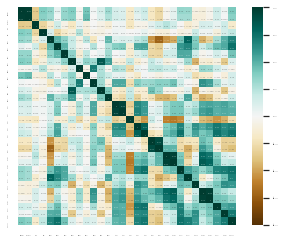

In [98]:
corr_mean_hm = sns.heatmap(
    corr_mean,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    cmap='BrBG',
    square=True,
    cbar=True,
    )

Check quickly for a .37 correlation (haven't filtered out 8 value responses yet)

<AxesSubplot:xlabel='score', ylabel='l2409'>

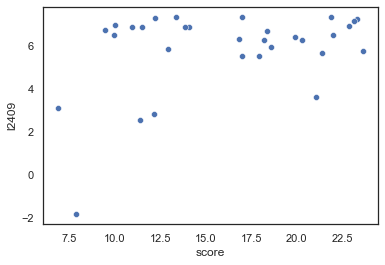

In [99]:
sns.set_theme(
    style="white",
    font_scale=1,
    )
sns.scatterplot(
    x='score',
    y='l2409',
    palette="gist_earth",
    data=merged_imp,
)

---

## Individual data analysis

This section adds mean water quality scores per province to each individual response of the `cgss` dataframe, thus analysis with more statistical significance can be done.

First, take only the s41 codes and wq mean scores from the `merge` dataframe, then add the water quality `score` to the main `cgss` dataframe:

In [100]:
wq = merge[['s41','score']]
cgss_wq = pd.merge(cgss,wq,on='s41')

This analysis will first be done on the `important` columns, from above:

In [119]:
cgss_wq_imp = cgss_wq[important_questions]
cgss_wq_imp_clean = cgss_wq_strict.dropna()
cgss_wq_imp_clean

score   s41  a2   a3a  a3b  a3c  a7a        a8a  a15        a62  a91  \
3      13.84  28.0   2  1948    2   15    1        0.0    3    11000.0  2.0   
5      13.84  28.0   1  1963   12    7    4    20000.0    4  9999998.0  2.0   
8      13.84  28.0   2  1973    2   19    3     4200.0    3     4200.0  2.0   
11     13.84  28.0   1  1964    2    6    4     5000.0    3    17000.0  2.0   
13     13.84  28.0   2  1964    2    2    6        0.0    4    20700.0  2.0   
...      ...   ...  ..   ...  ...  ...  ...        ...  ...        ...  ...   
11739  17.93   8.0   2  1989   11    8    3  9999997.0    5    68000.0  2.0   
11744  17.93   8.0   2  1987   11    3    4  9999997.0    4   134100.0  2.0   
11757  17.93   8.0   2  1991   11   29    6  9999997.0    5    90000.0  2.0   
11767  17.93   8.0   2  1962    2   20    1     3000.0    2    39000.0  2.0   
11775  17.93   8.0   2  1982   12    5    3     5000.0    4    13700.0  2.0   

       a92   l1a   l1b  l6a   l7a   l7b  l8a  l8b  l12a  l12b  l12c  l137  \
3      2.0   8.0   2.0  4.0  98.0  98.0  8.0  8.0   4.0   4.0   2.0   2.0   
5      2.0   2.0   6.0  4.0   3.0   6.0  4.0  4.0   3.0   3.0   3.0   4.0   
8      2.0  98.0  98.0  4.0   1.0   4.0  3.0  2.0   2.0   2.0   2.0   4.0   
11     2.0   3.0   6.0  4.0   7.0  98.0  8.0  8.0   2.0   2.0   2.0   4.0   
13     2.0  98.0  98.0  4.0   4.0   4.0  2.0  2.0   2.0   2.0   3.0   2.0   
...    ...   ...   ...  ...   ...   ...  ...  ...   ...   ...   ...   ...   
11739  2.0   4.0   8.0  2.0   6.0   6.0  4.0  1.0   2.0   2.0   2.0   2.0   
11744  2.0   2.0   1.0  2.0   6.0   4.0  2.0  2.0   2.0   4.0   3.0   4.0   
11757  2.0   2.0   4.0  3.0   2.0   6.0  4.0  3.0   2.0   4.0   2.0   2.0   
11767  1.0   2.0   4.0  5.0   1.0   2.0  1.0  1.0   1.0   2.0   1.0   4.0   
11775  1.0   8.0   2.0  2.0   8.0   3.0  1.0  1.0   5.0   5.0   5.0   1.0   

       l14d  l15a  l15b  l16c  l20e  l2409  
3       8.0   8.0   8.0   8.0   4.0    8.0  
5       2.0   8.0   2.0   2.0   2.0    8.0  
8       1.0   1.0   1.0   4.0   4.0    8.0  
11      4.0   8.0   8.0   4.0   1.0    8.0  
13      3.0   2.0   2.0   2.0   3.0    8.0  
...     ...   ...   ...   ...   ...    ...  
11739   2.0   1.0   2.0   3.0   4.0    8.0  
11744   4.0   1.0   2.0   2.0   2.0    8.0  
11757   2.0   2.0   2.0   1.0   2.0    8.0  
11767   4.0   1.0   1.0   4.0   2.0    1.0  
11775   3.0   2.0   2.0   1.0   4.0    1.0  

[2183 rows x 29 columns]

Filter out negative values and unknown ('8')

In [120]:
wq_imp_clean = cgss_wq_imp_clean[
    (cgss_wq_imp_clean.l14d > 0) 
     & (cgss_wq_imp_clean.l14d < 6) 
     & (cgss_wq_imp_clean.l2409 > 0) 
     # (cgss_wq_imp_clean.l2409 < 3)
    ]
wq_imp_clean

score   s41  a2   a3a  a3b  a3c  a7a        a8a  a15        a62  a91  \
5      13.84  28.0   1  1963   12    7    4    20000.0    4  9999998.0  2.0   
8      13.84  28.0   2  1973    2   19    3     4200.0    3     4200.0  2.0   
11     13.84  28.0   1  1964    2    6    4     5000.0    3    17000.0  2.0   
13     13.84  28.0   2  1964    2    2    6        0.0    4    20700.0  2.0   
15     13.84  28.0   1  1933   11    3    2    22000.0    2    23000.0  2.0   
...      ...   ...  ..   ...  ...  ...  ...        ...  ...        ...  ...   
11739  17.93   8.0   2  1989   11    8    3  9999997.0    5    68000.0  2.0   
11744  17.93   8.0   2  1987   11    3    4  9999997.0    4   134100.0  2.0   
11757  17.93   8.0   2  1991   11   29    6  9999997.0    5    90000.0  2.0   
11767  17.93   8.0   2  1962    2   20    1     3000.0    2    39000.0  2.0   
11775  17.93   8.0   2  1982   12    5    3     5000.0    4    13700.0  2.0   

       a92   l1a   l1b  l6a  l7a   l7b  l8a  l8b  l12a  l12b  l12c  l137  \
5      2.0   2.0   6.0  4.0  3.0   6.0  4.0  4.0   3.0   3.0   3.0   4.0   
8      2.0  98.0  98.0  4.0  1.0   4.0  3.0  2.0   2.0   2.0   2.0   4.0   
11     2.0   3.0   6.0  4.0  7.0  98.0  8.0  8.0   2.0   2.0   2.0   4.0   
13     2.0  98.0  98.0  4.0  4.0   4.0  2.0  2.0   2.0   2.0   3.0   2.0   
15     2.0   3.0  98.0  3.0  6.0   6.0  4.0  4.0   1.0   1.0   1.0   5.0   
...    ...   ...   ...  ...  ...   ...  ...  ...   ...   ...   ...   ...   
11739  2.0   4.0   8.0  2.0  6.0   6.0  4.0  1.0   2.0   2.0   2.0   2.0   
11744  2.0   2.0   1.0  2.0  6.0   4.0  2.0  2.0   2.0   4.0   3.0   4.0   
11757  2.0   2.0   4.0  3.0  2.0   6.0  4.0  3.0   2.0   4.0   2.0   2.0   
11767  1.0   2.0   4.0  5.0  1.0   2.0  1.0  1.0   1.0   2.0   1.0   4.0   
11775  1.0   8.0   2.0  2.0  8.0   3.0  1.0  1.0   5.0   5.0   5.0   1.0   

       l14d  l15a  l15b  l16c  l20e  l2409  
5       2.0   8.0   2.0   2.0   2.0    8.0  
8       1.0   1.0   1.0   4.0   4.0    8.0  
11      4.0   8.0   8.0   4.0   1.0    8.0  
13      3.0   2.0   2.0   2.0   3.0    8.0  
15      3.0   2.0   2.0   1.0   4.0    8.0  
...     ...   ...   ...   ...   ...    ...  
11739   2.0   1.0   2.0   3.0   4.0    8.0  
11744   4.0   1.0   2.0   2.0   2.0    8.0  
11757   2.0   2.0   2.0   1.0   2.0    8.0  
11767   4.0   1.0   1.0   4.0   2.0    1.0  
11775   3.0   2.0   2.0   1.0   4.0    1.0  

[1979 rows x 29 columns]

In [121]:
maov = MANOVA.from_formula('l14d + l2409 ~ s41 + score', data=wq_imp_clean)
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.6818 2.0000 1975.0000 460.8016 0.0000
         Pillai's trace 0.3182 2.0000 1975.0000 460.8016 0.0000
 Hotelling-Lawley trace 0.4666 2.0000 1975.0000 460.8016 0.0000
    Roy's greatest root 0.4666 2.0000 1975.0000 460.8016 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
           s41           Value  Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.9985 2.0000 1975.0000  1.4759 0.2288
          Pillai's trace 0.0015 2.0000 1975.0000  1.4759 0.

Conduct OLS regression with l14d dependent on gender, age (year) and income:

In [122]:
ols_perception = smf.ols('l14d ~ s41 + score + a2 + a3a + a7a + a91', data = wq_imp_clean).fit()
print(ols_perception.summary())

                            OLS Regression Results                            
Dep. Variable:                   l14d   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     11.87
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.43e-11
Time:                        09:33:36   Log-Likelihood:                -2475.7
No. Observations:                1979   AIC:                             4963.
Df Residuals:                    1973   BIC:                             4997.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1706      0.501     -0.340      0.7

*Think of a way to run the ols for knowledge without the l2409 = 8 values*

In [123]:
ols_knowledge = smf.ols('l2409 ~ s41 + score + a2 + a3a + a7a + a91', data = wq_imp_clean).fit()
print(ols_knowledge.summary())

                            OLS Regression Results                            
Dep. Variable:                  l2409   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.86
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.49e-12
Time:                        09:33:41   Log-Likelihood:                -4853.2
No. Observations:                1979   AIC:                             9718.
Df Residuals:                    1973   BIC:                             9752.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9669      1.666      1.181      0.2

### Initial Findings
With P>|t| ~0.05 or less (0.055), this can be argued that an increased wq score (worse) leads to an decreased number for l14d (perceived to be more harmful)

The higher the education (a7a increases), the l14d number goes down (the perceived severity increases)

(The coef is negative for both, which indicates a negative relation/correlation)

**Keep in `l2409` unsure (8) since it increases observations and therefore statistical power (.02 vs .055)**

Thus: Water quality (score) is correlated with perception (l14d) & education (a7a) is correlated to perception, Also (not shown) education is coorelated with wq knowledge (l2409), but score is not correlated with wq knowledge.

#### Test for divergence
Seeing if there's a correlation between the difference between perception and score, and another variable.

Import main data, groupby and take mean...

In [151]:
tst = wq_imp_clean[['score','s41','l14d']].groupby('s41').agg('mean')
tst.describe()

score       l14d
count  31.000000  31.000000
mean   16.130482   2.205446
std     5.089124   0.248531
min     6.901250   1.736842
25%    11.835313   2.034139
50%    16.965556   2.140625
75%    20.685417   2.374687
max    23.630000   2.909091

Normalize the data (0-1) using code I found [here](https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame): 

In [165]:
test = tst.apply(lambda x: x/x.max(), axis=0)

Make new column with the difference between the score and perception. Perception number goes up as perceived severity goes down. Score goes up as water quality gets worse. 

Diff increases when the two are more different (positive if poor wq and severe perception, negative if good wq and good perception)

In [170]:
test['diff'] = test['score'] - test['l14d']
test

score      l14d      diff
s41                               
1.0   0.905628  0.644261  0.261367
2.0   0.487542  0.814145 -0.326602
3.0   0.892122  0.893750 -0.001628
4.0   0.787135  0.712963  0.074172
5.0   0.842996  0.756250  0.086746
6.0   0.424702  0.845221 -0.420518
7.0   1.000000  0.687500  0.312500
8.0   0.758781  1.000000 -0.241219
9.0   0.718472  0.675223  0.043249
10.0  0.925045  0.800293  0.124752
11.0  0.986458  0.717134  0.269324
12.0  0.770973  0.793423 -0.022450
13.0  0.565897  0.820565 -0.254668
14.0  0.480909  0.710417 -0.229507
15.0  0.777369  0.698471  0.078898
16.0  0.463317  0.779851 -0.316534
17.0  0.978956  0.723060  0.255896
18.0  0.717967  0.818452 -0.100486
19.0  0.546686  0.704566 -0.157880
20.0  0.968324  0.597039  0.371285
21.0  0.596649  0.844747 -0.248098
22.0  0.421770  0.759577 -0.337806
23.0  0.514177  0.687500 -0.173323
24.0  0.517751  0.735840 -0.218089
25.0  0.332023  0.687500 -0.355477
26.0  0.399727  0.700000 -0.300273
27.0  0.930839  0.752976  0.177862
28.0  0.585696  0.870117 -0.284421
29.0  0.712823  0.877467 -0.164644
30.0  0.292055  0.687500 -0.395445
31.0  0.858654  0.705981  0.152673

Plot difference vs wq score

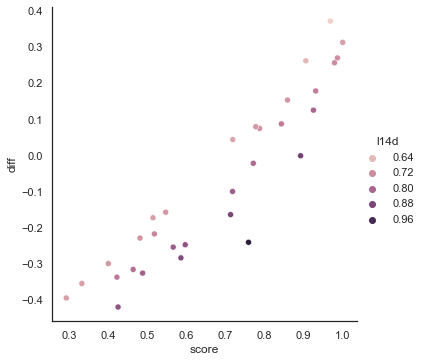

In [175]:
sns.relplot(
    data=test,
    x="score",
    y="diff",
    hue='l14d'
    )

Interesting! ^